![](https://www.somaurbanismo.com.br/wp-content/uploads/2017/10/Simbolo-Outubro-Rosa-Soma-Urbanismo-1.jpg)

---

# **OUTUBRO ROSA: DETECÇÃO DE CÂNCER DE MAMA USANDO MACHINE LEARNING**

---
---
Última atualização em 18 outubro de 2020

---

O Câncer de Mama é o mais frequente e a maior causa de morte por câncer na população feminina em todo o mundo. De acordo com o Instituto Nacional de Câncer (INCA), **as estimativas para o ano de 2020 chegam a 66.280 novos casos de câncer de mama no Brasil.**

Apesar dessa doença também acometer homens, o número de casos é muito pequeno, consistindo em apenas 1% do total de casos. **Em 2018, o número de mortes por câncer de mama no Brasil foi de 17.763, sendo 17.572 mulheres e 189 homens (INCA).**

Segundo a Sociedade Brasileira de Mastologia, uma em cada 12 mulheres terá um tumor nas mamas até os 90 anos de idade. As chances de cura em caso de diagnóstico precoce chegam a 95%.

Além disso, de acordo com dados do INCA, cerca de 30% dos casos de câncer de mama podem ser evitados com a adoção de hábitos saudáveis como:
* Praticar atividade física;
* Alimentar-se de forma saudável;
* Manter o peso corporal adequado;
* Evitar o consumo de bebidas alcoólicas;
* Amamentar;
* Evitar uso de hormônios sintéticos, como anticoncepcionais e terapias de reposição hormonal.

### **Proposta deste Projeto**

O objetivo do presente trabalho é realizar análises exploratória em um conjunto de dados sobre câncer de mama, a fim de compreender o comportamento dos dados e, posteriormente, aplicar um modelo de Machine Learning para prever os casos desse tipo de câncer.

Este artigo também visa contribuir para a conscientização a respeito da campanha Outubro Rosa e da importância da prevenção e diagnóstico precoce do câncer de mama. Além de mostrar que a Inteligência Artificial é uma das melhores soluções para auxiliar a detecção da doença.

### **Obtenção dos Dados**

O primeiro passo em qualquer projeto de análise de dados é a compreensão do problema. Neste caso específico, o conjunto de dados em questão foi extraído do Repositório de Machine Learning da UCI, e contém dados sobre Câncer de Mama no estado de Winconsin, EUA.

O conjunto de dados consiste de um arquivo .csv contendo 569 entradas e 32 colunas, cujas observações foram obtidas por meio da aspiração com agulha fina de células da mama.

### **Análise Exploratória**

Esta etapa é considerada é, basicamente, a mais importante do projeto, pois ela requer cerca de 70% do tempo total de dedicação. As principais informações e respostas para perguntas iniciais podem ser obtidas através da análise exploratória dos dados, além disso, o desempenho dos modelos de machine learning construídos dependem diretamente desta etapa do projeto.

Inicialmente, precisamos importar as principais bibliotecas que serão utilizadas ao longo da resolução do problema, que são:

* Pandas;
* Matplotlib;
* Seaborn; e
* Numpy.

Caso haja a necessidade de utilizar alguma outra *lib*, como scikt-learn, será importada ademais. 

In [39]:
# IMPORTAÇÃO DAS BIBLIOTECAS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(palette = "flare", color_codes = True)

In [22]:
# IMPORTAÇÃO DO CONJUNTO DE DADOS

df = pd.read_csv("https://raw.githubusercontent.com/jeffersonverissimo/datasets/master/breast-cancer-wisconsin.csv")

In [17]:
# VISUALIZAÇÃO DAS PRIMEIRAS 5 LINHAS

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concavepoints_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concavepoints_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concavepoints_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**Agora que já tivemos uma visão geral do conjunto de dados, podemos iniciar as análises.**

In [26]:
# TAMANHO DO DATASET

df.shape

(569, 32)

In [21]:
# VERIFICANDO OS TIPOS DAS VARIÁVEIS

df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concavepoints_mean         float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concavepoints_se           float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [27]:
# VALORES AUSENTES

((df.isnull().sum() / df.shape[0])*100).sort_values(ascending = False)

fractal_dimension_worst    0.0
symmetry_worst             0.0
diagnosis                  0.0
radius_mean                0.0
texture_mean               0.0
perimeter_mean             0.0
area_mean                  0.0
smoothness_mean            0.0
compactness_mean           0.0
concavity_mean             0.0
concavepoints_mean         0.0
symmetry_mean              0.0
fractal_dimension_mean     0.0
radius_se                  0.0
texture_se                 0.0
perimeter_se               0.0
area_se                    0.0
smoothness_se              0.0
compactness_se             0.0
concavity_se               0.0
concavepoints_se           0.0
symmetry_se                0.0
fractal_dimension_se       0.0
radius_worst               0.0
texture_worst              0.0
perimeter_worst            0.0
area_worst                 0.0
smoothness_worst           0.0
compactness_worst          0.0
concavity_worst            0.0
concavepoints_worst        0.0
id                         0.0
dtype: f

Como podemos perceber acima, o conjunto de dados não apresenta valores ausentes, o que é muito bom, pois não precisaremos tratar esses dados para este problema específico e isso reflete numa melhor performance dos modelos implementados, uma vez que não temos a perda de informações importantes.

Podemos extrair informações estatísticas básicas, seja do conjunto de dados inteiro ou de cada coluna separadamente. Por exemplo, para visualizar o resumo estatísticos de todas as variáveis juntas, usamos a função '.describe'.

In [28]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concavepoints_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concavepoints_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concavepoints_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Podemos também visualizar as informações estatísticas através de histogramas das variáveis.

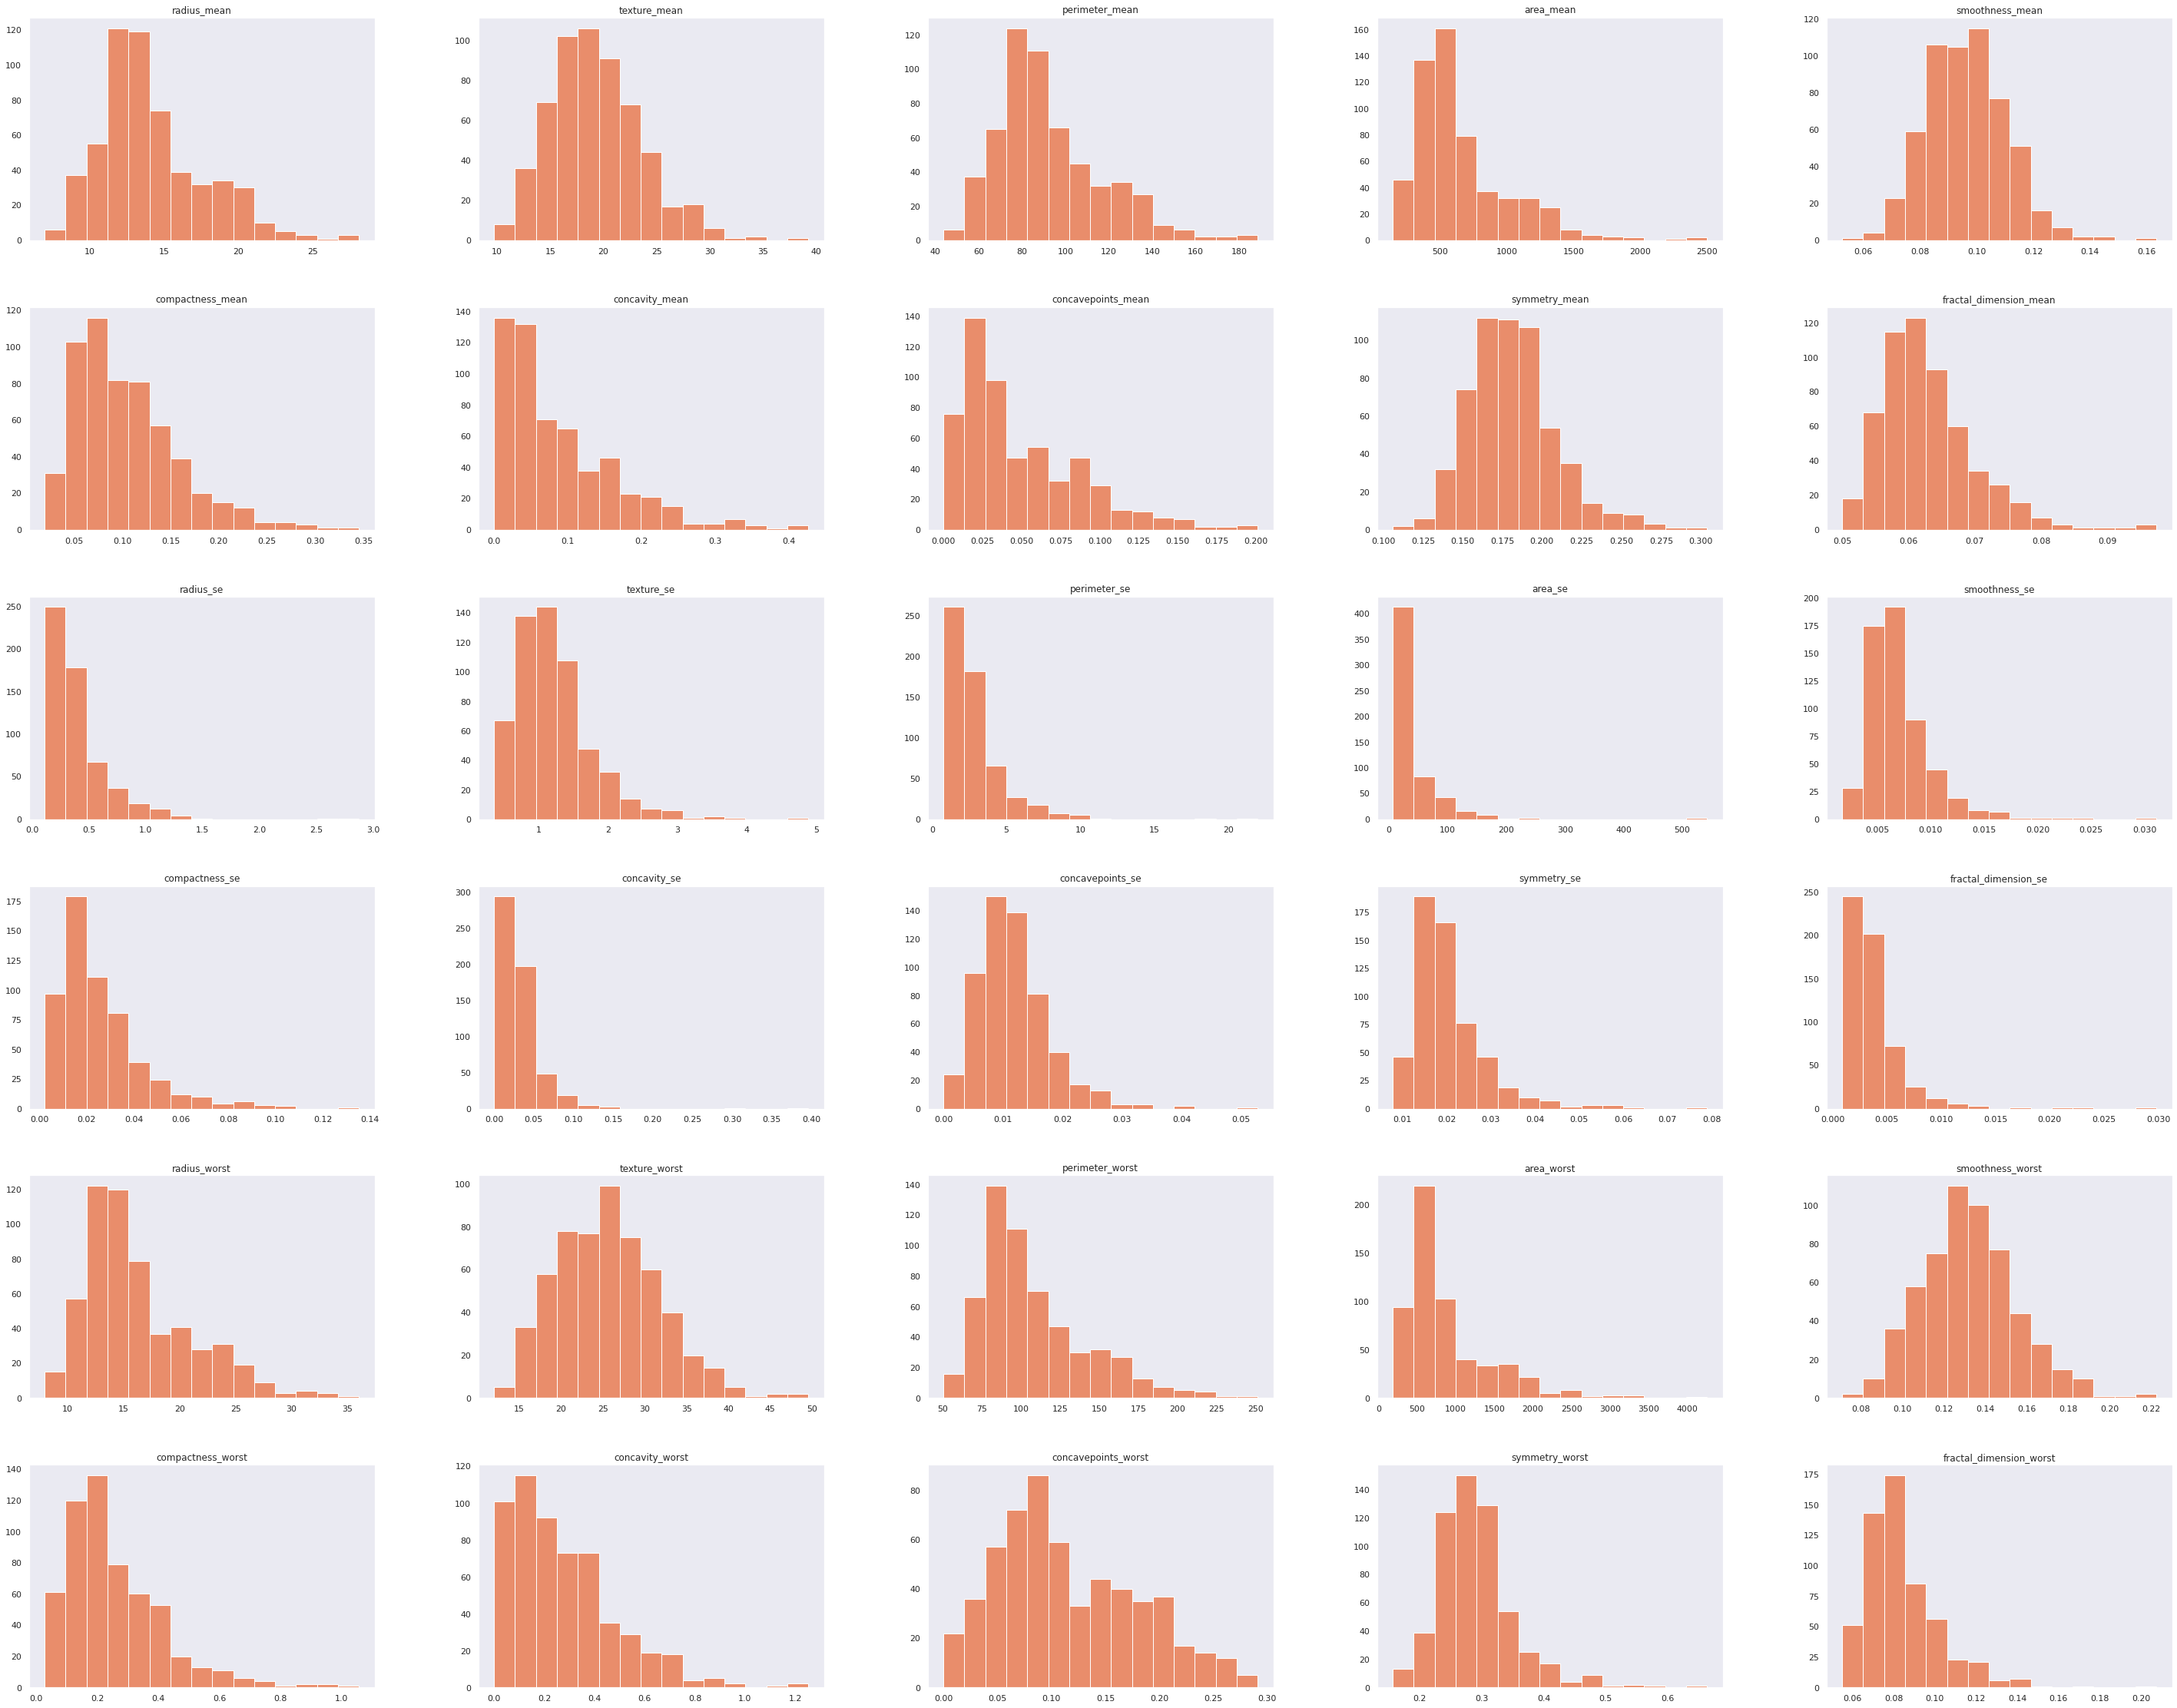

In [40]:
# HISTOGRAMAS

histograma = df.drop('id', axis =1 )
histograma.hist(bins = 15, figsize = (50,40), grid = False)
plt.show()

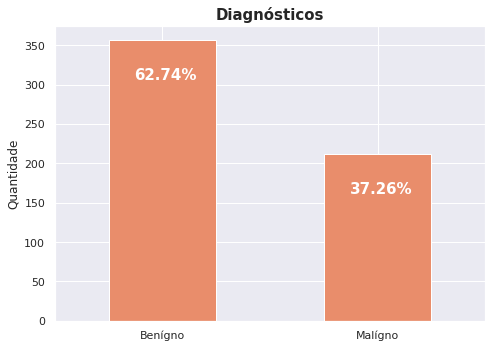

In [41]:
# GRÁFICO DO NÚMERO DE DIAGNÓSTICOS

fig, ax = plt.subplots(figsize = (7,5))
ax = df.diagnosis.value_counts().plot(kind = 'bar')
ax.set_title('Diagnósticos', fontsize = 15, loc ='center', weight = 'bold')
ax.set_ylabel('Quantidade')
ax.set_xticklabels(['Benígno', 'Malígno'], rotation = 0)

total = []

for i in ax.patches:
    total.append(i.get_height())

soma = sum(total)

for i in ax.patches:
    ax.text(i.get_x() + .12, i.get_height() - 50,
            str(round((i.get_height()/soma)*100, 2)) + '%',
            fontsize = 15, color = 'white', weight = 'bold')
    
plt.tight_layout()

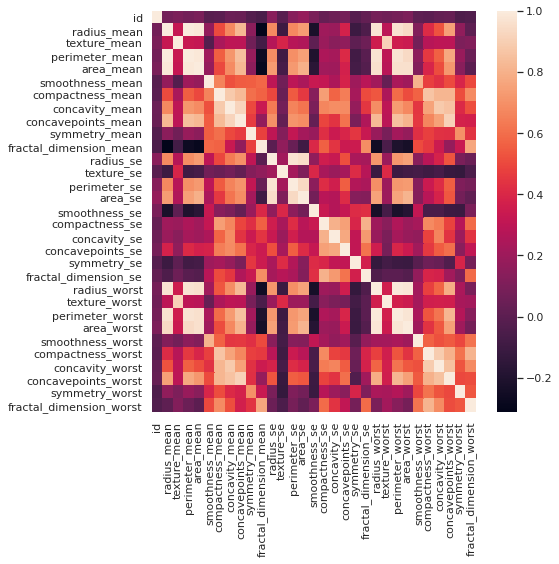

In [47]:
fig, ax = plt.subplots(figsize = (8,8))
ax = sns.heatmap(df.corr())

plt.tight_layout()

Acima podemos observar um mapa de calor apresentando a correlação entre as variáveis. Quanto mais próximo de 1 (cor branca) maior a correlação positiva, o contrário ocorre quando se aproxima da cor violeta (correlação negativa).

### **Preparação dos Dados**

O modelo preditivo a ser implementado após a análise exploratória será de Aprendizado Supervisionado, com base nisso e nas descrições das colunas do dataset, é fácil identificar que a coluna Diagnosis é a variável alvo (target).

Contudo, antes de implementar o modelo de Machine Learning, é preciso fazer o tratamento dos dados que irão alimentar o modelo. Nesta etapa, devemos nos preocupar em fazer os ajustes finais dos dados. Esses ajustes envolvem a padronização das features, criação de novas variáveis, limpeza dos dados, separação do dataset, etc.

Para alimentar o modelo de Machine Learning, é necessário separar a variável alvo (dependente) das demais variáveis (independentes). Por padrão, é comum fazer a divisão do conjunto de dados em variáveis nomeadas como X e y. Este projeto seguiu a mesma ideia.

**Padronização dos Dados**

Após separar as variáveis devidamente, como parte do pré-processamento dos dados, que irão alimentar o modelo de Machine Learning, foi utilizado o StardardScaler, que vem junto com sklearn.preprocessing, para padronizar os dados numéricos.



In [53]:
# SEPARAÇÃO DAS VARIÁVEIS EM DEPENDENTE E INDEPENDENTE

X = df.drop(['diagnosis','id'], axis = 1)
y = df.diagnosis

Após separar as variáveis devidamente, como parte do pré-processamento dos dados, que irão alimentar o modelo de Machine Learning, foi utilizado o **StardardScaler**, que vem junto com **sklearn.preprocessing**, para padronizar os dados numéricos.

In [55]:
# PADRONIZAÇÃO DOS DADOS

from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)

Ao analisar o conjunto de dados, percebemos também que a variável alvo, '**diagnosis**', é do tipo categórica e isso é um problema para os modelos de Machine Learning, pois eles não conseguem processar dados desse tipo, mas apenas números. Assim, devemos converter a variável 'diagnosis' para numérica. Para isso, podemos usar o **LabelEncoder**.

In [56]:
# CONVERSÃO DAS VARIÁVEIS CATEGÓRICAS EM NUMÉRICAS 

from sklearn.preprocessing import LabelEncoder

y = LabelEncoder().fit_transform(y)

**Modelo com os Dados Desbalanceados**

In [ ]:
# IMPORTAÇÃO DO MODELO DE REGRESSÃO LOGÍSTICA

from sklearn.linear_model import LogisticRegression

# DIVISÃO DOS DADOS EM TREINO E TESTE

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.28)

# INSTANCIANDO O MODELO

LR_model = LogisticRegression(solver = 'liblinear')

# TREINANDO O MODELO

LR_model.fit(X_train, y_train)

**Avaliação do Modelo**

In [59]:
# PREDIÇÃO DO MODELO

y_pred = LR_model.predict(X_test)

In [62]:
# ACURÁCIA DO MODELO

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

print('Acurácia: ', accuracy_score(y_test, y_pred))

Acurácia:  0.96875


In [63]:
# Relatório de Classificação

print('\n[Classification Report] Regressão Logística')
print( classification_report(y_test, y_pred))


[Classification Report] Regressão Logística
              precision    recall  f1-score   support

           0       0.97      0.98      0.97        95
           1       0.97      0.95      0.96        65

    accuracy                           0.97       160
   macro avg       0.97      0.97      0.97       160
weighted avg       0.97      0.97      0.97       160



**O modelo obteve excelentes resultados, apresentando uma acurácia de quase 97%. E o bom desempenho é confirmado através dos parâmetros recall e f1-score.**

### **Modelo com os Dados Balanceados**

Ao lidar com classes desbalanceadas, podem ser aplicados os métodos de Undersampling e Oversampling, por exemplo.
No primeiro caso, a técnica consiste em reduzir os exemplos da classe majoritária de forma aleatória. Já o segundo, faz réplicas dos dados da classe minoritária.

Porém, mesmo utilizando essas técnicas descritas acima, o modelo de Machine Learning ainda pode ficar enviesado de alguma forma. Para tentar contornar isso, podemos usar Feature Engineering.
Neste projeto, optei por aplicar a técnica de Undersampling, usando algoritmo NearMiss para esta finalidade.

In [ ]:
# IMPORTAÇÃO DA BIBLIOTECA NEARMISS

from imblearn.under_sampling import NearMiss

# INSTANCIANDO O ALGORITMO

NM = NearMiss()

# APLICANDO O UNDERSAMPLING

X, y = NM.fit_sample(X,y)

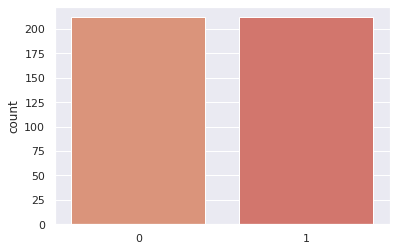

In [65]:
ax = sns.countplot(x = y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.28)

# INSTANCIANDO O MODELO

LR_model = LogisticRegression(solver = 'liblinear')

# TREINANDO O MODELO

LR_model.fit(X_train, y_train)

In [67]:
# PREDIÇÃO DO MODELO

y_pred = LR_model.predict(X_test)

In [69]:
# ACURÁCIA DO MODELO

print('Acurácia: ', accuracy_score(y_test, y_pred))

Acurácia:  0.9747899159663865


In [70]:
# Relatório de Classificação

print('\n[Classification Report] Regressão Logística')
print( classification_report(y_test, y_pred))


[Classification Report] Regressão Logística
              precision    recall  f1-score   support

           0       0.97      0.98      0.98        60
           1       0.98      0.97      0.97        59

    accuracy                           0.97       119
   macro avg       0.97      0.97      0.97       119
weighted avg       0.97      0.97      0.97       119



Como pudemos observar, o balanceamento das classes refletiu na melhora da performance do modelo, onde a acurácia passsou de **0.96875** (dados desbalanceados), para **0.97478** (dados balanceados).

Essa melhora também pode ser percebida nos parâmetros ***recall*** e ***f1-score***.

Apesar de serem pequenos aumentos na performance do modelo, essa melhora é fundamental quando tratamos especialmente de aplicações na área da saúde, uma vez que os diagnósticos precisam ser extremamente precisos.